<!--NOTEBOOK_HEADER-->
*This notebook contains material from [CBE60499](https://ndcbe.github.io/CBE60499);
content is available [on Github](git@github.com:ndcbe/CBE60499.git).*


<!--NAVIGATION-->
| [Contents](toc.html) | [Tag Index](tag_index.html) | [1.1 60 Minutes to Pyomo: An Energy Storage Model Predictive Control Example](https://ndcbe.github.io/CBE60499/01.01-Pyomo-Nuts-and-Bolts.html) ><p><a href="https://colab.research.google.com/github/ndcbe/CBE60499/blob/master/docs/01.00-Pyomo-Introduction.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/CBE60499/01.00-Pyomo-Introduction.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 1.0 Getting Started with Pyomo

## 1.0.1 Local Installation

### 1.0.1.1 Install anaconda

Anaconda is a Python distribution that supports the `conda` package manager and environments. Follow these steps if you do not have anaconda or miniconda already installed:
* https://docs.anaconda.com/anaconda/install/
* https://docs.conda.io/en/latest/miniconda.html

### 1.0.1.2 Create a new conda environment

`conda` envirorments allow us to maintain several difference Python installations on our computer. This allows for easy switching between Python versions or different versions of Python packages. Using an environment will ensure anything we install for this class does not disrupt your other Python workflows.

After installing `conda`, run this command in the terminal:

```
conda create --name spring2021 python=3.8
```

This creates an environment called `spring2021`. Next we need to activate it:

```
conda activate spring2021
```

Whenever you open a new terminal, you will likely need to activate our new environment.

### 1.0.1.3 Install IDAES-PSE

The IDAES-PSE toolset (Institute for the Design of Advanced Energy Systems - Process Systems Engineering) is an open-source framework for multiscale process modeling, optimization, and advanced analytics. The IDAES toolset is built on top of Pyomo. We'll mainly use Pyomo in this class, although we'll highlight a few IDAES capabilities.

To install `idaes`, run:

```
 conda install -c idaes-pse -c conda-forge idaes-pse
```

This command will install `idaes` as well as all of its dependencies, including `pyomo`.

After `conda` finishes, run:

```
idaes --version
```

To verify `idaes` is installed in your active environment.

### 1.0.1.4 Install Ipopt

**Windows and Linux users** - you are in luck. IDAES comes with a nonlinear optimization solver Ipopt compiled with the HSL linear algebra routines; I may refer to this as "good Ipopt". Later in the semester, we'll talk about why the linear alegbra library is important. To install the "good Ipopt", run:

```
idaes get-extensions
```

Linux users: you may need to install some dependencies too: https://idaes-pse.readthedocs.io/en/stable/getting_started/index.html#linux

This will install Ipopt in a hidden user folder. If you get the error `WARNING: Could not locate the 'ipopt' executable` add the line `import idaes` to the top of your notebook then restart the Python kernel. Our library `helper` takes care of adding Ipopt to the system path on Colab. If you use the instructions below, "okay" Ipopt will be installed.

**macOS users** - unfortunately, IDAES does not include binaries for "good Ipopt". You can either compile the solver yourself after obtaining an academic license for HSL or you can install the "okay Ipopt" using conda:

```
conda install -c conda-forge ipopt
```

### 1.0.1.5 Install Additional Solvers

In additional to `ipopt`, we will also use `glpk`. To install it, run:

```
conda install -c conda-forge glpk
```

You may also wish to install other commercial solvers, especially if you want to consider large mixed integer optimization problems for research. These solvers offer free academic licenses:
* CPLEX: https://www.ibm.com/products/ilog-cplex-optimization-studio
* Gurobi: https://www.gurobi.com/downloads/end-user-license-agreement-academic/

### 1.0.1.6 Install Notebook Spellcheker

Here is a great Jupyter extension that adds a [spellchecker](https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/nbextensions/spellchecker/README.html) to your notebooks. To install, run the following commands in the terminal (in your new conda environment):

```
conda install -c conda-forge jupyter_contrib_nbextensions
jupyter contrib nbextension install --user
jupyter nbextension enable spellchecker/main
```


## 1.0.2 Cloud Computing with Google Colab

In [1]:
## Tip: Please put code like this at the top of your notebook.
# We want all of the module/package installations to start up front

import sys
if "google.colab" in sys.modules:
    !wget "https://raw.githubusercontent.com/ndcbe/CBE60499/main/notebooks/helper.py"
    import helper
    helper.install_idaes()
    helper.install_ipopt()

## 1.0.3 Your First Optimization Problem

We are now ready to solve your first optimization problem in Pyomo.

### 1.0.3.1 Mathematical Model

Let's start with a purely mathematical example:

$$\begin{align*} \min_{x} \quad & x_1^2 + 2 x_2^2 - x_3 \\
\mathrm{s.t.} \quad & x_1 + x_2 = 1 \\
& x_1 + 2 x_2 - x_3 = 5 \\
& -10 \leq x_1, x_2, x_3 \leq 10 
\end{align*} $$

We want to solve the constrained optimization problem numerically.

### 1.0.3.2 Define the Model in Pyomo

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Activity</b>: Fill in the missing constraint.
</div>

In [2]:
import pyomo.environ as pyo

# Create instance of concrete Pyomo model.
# concrete means all of the sets and model data are specified at the time of model construction.
# In this class, you'll use a concrete model.
m = pyo.ConcreteModel()

## Declare variables with initial values with bounds
m.x1 = pyo.Var(initialize=1, bounds=(-10, 10))
m.x2 = pyo.Var(initialize=1, bounds=(-10, 10))
m.x3 = pyo.Var(initialize=1, bounds=(-10, 10))

## Declare objective
m.OBJ = pyo.Objective(expr=m.x1**2 + 2*m.x2**2 - m.x3, sense = pyo.minimize)

## Declare equality constraints
m.h1 = pyo.Constraint(expr= m.x1 + m.x2 == 1)

# YOUR SOLUTION HERE

## Display model
m.pprint()

3 Var Declarations
    x1 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -10 :     1 :    10 : False : False :  Reals
    x2 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -10 :     1 :    10 : False : False :  Reals
    x3 : Size=1, Index=None
        Key  : Lower : Value : Upper : Fixed : Stale : Domain
        None :   -10 :     1 :    10 : False : False :  Reals

1 Objective Declarations
    OBJ : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize : x1**2 + 2*x2**2 - x3

2 Constraint Declarations
    h1 : Size=1, Index=None, Active=True
        Key  : Lower : Body    : Upper : Active
        None :   1.0 : x1 + x2 :   1.0 :   True
    h2 : Size=1, Index=None, Active=True
        Key  : Lower : Body           : Upper : Active
        None :   5.0 : x1 + 2*x2 - x3 :   5.0 :   True

6 Declarations: x1 x2 x3 OBJ h1 h2


### 1.0.3.3 Solve using Ipopt

Toward the end of the semester we will learn, in perhaps more detail than you care, what makes Ipopt work under the hood. For now, we'll use it as a computational tool.

In [3]:
opt1 = pyo.SolverFactory('ipopt')
status1 = opt1.solve(m, tee=True)

Ipopt 3.13.2: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.13.2, running with linear solver ma27.

Number of nonzeros in equality constraint Jacobian...:        5
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        3
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        3
                     variables with only upper bounds:        0
Total number of equality constraints.................:        2
Total number of ineq

### 1.0.3.4 Inspect the Solution

Now let's inspect the solution. We'll use the function `value()` to extract the numeric value from the Pyomo variable object.

In [4]:
## Return the solution
print("x1 = ",pyo.value(m.x1))
print("x2 = ",pyo.value(m.x2))
print("x3 = ",pyo.value(m.x3))
print("\n")

x1 =  0.4999999999666826
x2 =  0.5000000000333175
x3 =  -3.499999999966682




### 1.0.3.5 Visualize the Solution

Is our answer correct?

We can solve this optimization problem with guess and check. If we guess $x_3$, we can then solve the constraints for $x_1$ and $x_2$:

$$\begin{bmatrix}
1 & 1 \\
1 & 2
\end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} 1 \\ 5 + x_3 \end{bmatrix}$$

We can then evaluate the objective. Let's see the graphical solution to our optimization problem.

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Activity</b>: Verify you agree with how to translate the two linear constraints into a linear system of questions.</div>

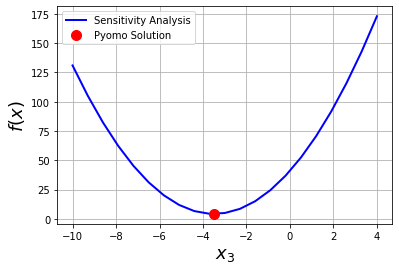

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def constraints(x3):
    ''' Solve the linear constraints
    
    Args:
        x3: Value for the decision variable x3
        
    Returns:
        x1 and x2: Values calculated from the constraints
    '''

    # Define the matrices in the above equations
    A = np.array([[1, 1],[1, 2]])
    b = np.array([1, 5+x3])

    # Solve the linear system of equations
    z = np.linalg.solve(A,b)
    x1 = z[0]
    x2 = z[1]
    return x1, x2

# Define a lambda function to plot the objective
objective = lambda x1, x2, x3: x1**2 + 2*x2**2 - x3

# Guess many values of x3.
x3_guesses = np.linspace(-10,4,21)
obj = []
for x3 in x3_guesses:
    # Solve the constraints to determine x1 and x2
    x1, x2 = constraints(x3)
    # Calculate the store the objective function value
    obj.append(objective(x1,x2,x3))

# Plot the objective function value versus x3
plt.plot(x3_guesses, obj,color='blue',linewidth=2,label="Sensitivity Analysis")
plt.xlabel("$x_3$",fontsize=18)
plt.ylabel("$f(x)$",fontsize=18)

# Plot the solution from Pyomo
x3_sln = pyo.value(m.x3)
obj_sln = pyo.value(m.OBJ)
plt.plot(x3_sln, obj_sln,marker='o',color='red',markersize=10,label="Pyomo Solution",linestyle='')
plt.legend()
plt.grid(True)
plt.show()

<!--NAVIGATION-->
| [Contents](toc.html) | [Tag Index](tag_index.html) | [1.1 60 Minutes to Pyomo: An Energy Storage Model Predictive Control Example](https://ndcbe.github.io/CBE60499/01.01-Pyomo-Nuts-and-Bolts.html) ><p><a href="https://colab.research.google.com/github/ndcbe/CBE60499/blob/master/docs/01.00-Pyomo-Introduction.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://ndcbe.github.io/CBE60499/01.00-Pyomo-Introduction.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>